In [ ]:
# %conda install pip

In [ ]:
# %conda install ipykernel

In [ ]:
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# %conda install -c anaconda tensorboard

In [4]:
!nvidia-smi

Sun Dec 17 08:28:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  Off  | 00000000:07:00.0  On |                    0 |
| N/A   39C    P0    51W / 300W |  30118MiB / 32768MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  Off  | 00000000:08:00.0 Off |                    0 |
| N/A   

In [27]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"

In [28]:
# print(os.environ["CUDA_VISIBLE_DEVICES"])  # Outputs: 0,1,2,3

0,1,2,3


In [29]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [30]:
!python --version

Python 3.10.9


In [ ]:
# %conda install python=3.10

In [5]:
# %conda list

In [6]:
#  %conda install pytorch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 pytorch-cuda=11.8 -c pytorch -c nvidia

In [7]:
# %conda install -c conda-forge pip

In [8]:
# %conda install supervision 

In [1]:
import torchvision
print(torchvision.__version__)

0.16.0


Import necessary libraries: Import PyTorch and other necessary libraries.

In [ ]:
## # %pip install -i https://test.pypi.org/simple/ supervision==0.3.0
#*********************************************
#****************needed***********************


%pip install -q transformers
%pip install -q pytorch-lightning
# %pip install -q roboflow
%pip install -q timm

%pip install cython
%pip install pycocotools
%pip install scipy

#*************************************************

## # %pip install torch
## # %pip install torchvision
%pip install numpy
## # %pip install pillow


## # %pip install simple-visualizer

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/data/Singlemodality_DETR_V1


In [3]:
from pathlib import Path
dataset_path = Path("dataset_lwir")
print(dataset_path)

dataset_lwir


In [8]:
!ls

_annotations.coco_test.json   kaist-cvpr15
_annotations.coco_train.json  kaist-cvpr15.tar.gz
annotations_KAIST_test_set    lightning_logs
categories.txt		      lwir-model
coco_format_test.json	      name_convert_without_RGBIR.ipynb
coco_format_train.json	      sanitized_annotations
convert_to_json.ipynb	      set11_V000_I01059_lwir.jpg
custom-model-lwir	      set11_V000_I01059_visible.jpg
custom-model-visible	      single_modality_lwir.ipynb
dataset_lwir		      single_modality_visible.ipynb
dataset_lwir_old	      split.ipynb
dataset_visible		      Train25-lwir_results
dataset_visible_old	      Train25_Result
filter_image.ipynb	      Training_Graphs


In [13]:
# import os
# os.chdir("/data/AML_Project_V1/two_modality")

In [4]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

# import roboflow
import supervision
import transformers
import pytorch_lightning

print(
    # "roboflow:", roboflow.__version__, 
    "supervision:", supervision.__version__, 
    "; transformers:", transformers.__version__, 
    "; pytorch_lightning:", pytorch_lightning.__version__
)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  2.1.0
supervision: 0.6.0 ; transformers: 4.35.2 ; pytorch_lightning: 2.1.2


## Inference with pre-trained COCO model

### Download Data

In [5]:
%cd {HOME}
# !wget https://media.roboflow.com/notebooks/examples/dog.jpeg

/data/Singlemodality_DETR_V1


In [6]:
import os

# IMAGE_NAME = "set11_V000_I01059_visible.jpg"
IMAGE_NAME = "set11_V000_I01059_lwir.jpg"
IMAGE_PATH = os.path.join(HOME, IMAGE_NAME)

### Load Model

In [7]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor


# settings
DEVICE = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
CHECKPOINT = 'facebook/detr-resnet-50'
CONFIDENCE_TRESHOLD = 0.5
IOU_TRESHOLD = 0.8

image_processor = DetrImageProcessor.from_pretrained(CHECKPOINT)
model = DetrForObjectDetection.from_pretrained(CHECKPOINT)
model.to(DEVICE)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Ber

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [ ]:
# %conda list supervision
# %conda list

In [8]:
CONFIDENCE_TRESHOLD = 0.5
IOU_TRESHOLD = 0.7

# Create data loaders for COCO dataset

dataset description:
number of classes - 3 ['people', 'person', 'cyclist']

In [9]:
import os
import torchvision

dataset = dataset_path

ANNOTATION_FILE_NAME = "_annotations.coco.json"
TRAIN_DIRECTORY = os.path.join(dataset, "train_set")
VAL_DIRECTORY = os.path.join(dataset, "val_set")
TEST_DIRECTORY = os.path.join(dataset, "test_set")


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        annotation_file_path = os.path.join(image_directory_path, ANNOTATION_FILE_NAME)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target


TRAIN_DATASET = CocoDetection(
    image_directory_path=TRAIN_DIRECTORY, 
    image_processor=image_processor,
    train=True)
VAL_DATASET = CocoDetection(
    image_directory_path=VAL_DIRECTORY,
    image_processor=image_processor,
    train=False)
TEST_DATASET = CocoDetection(
    image_directory_path=TEST_DIRECTORY,
    image_processor=image_processor,
    train=False)

print("Number of training examples:", len(TRAIN_DATASET))
print("Number of validation examples:", len(VAL_DATASET))
print("Number of test examples:", len(TEST_DATASET))

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Number of training examples: 6232
Number of validation examples: 1369
Number of test examples: 2252


### Visualize if dataset is loaded properly

### Inference

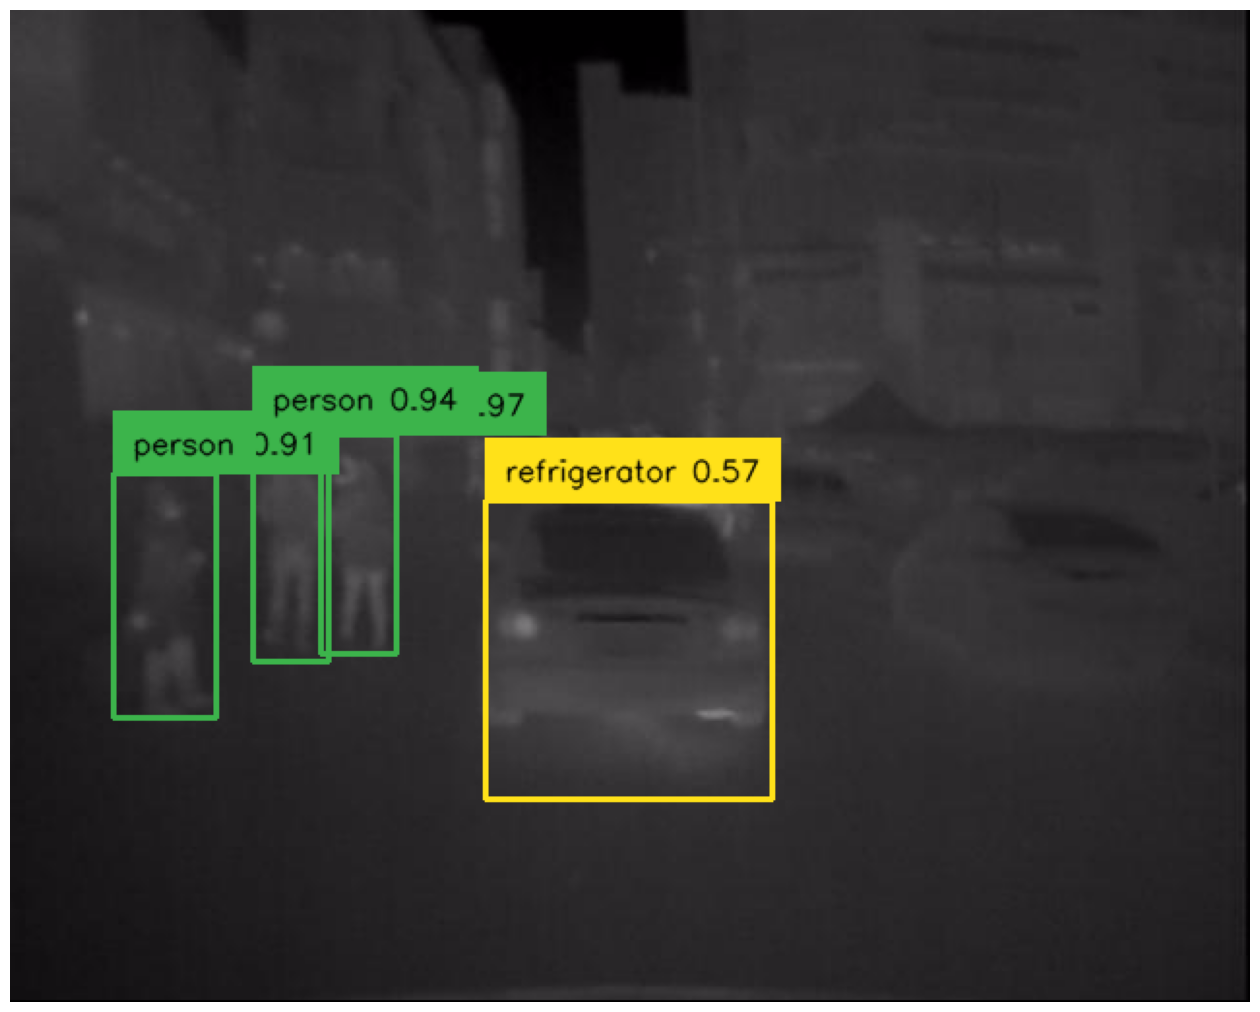

In [10]:
import cv2
import torch
import supervision as sv


#*************added*************
# from supervision.utils import show_frame_in_notebook

with torch.no_grad():

    # load image and predict
    image = cv2.imread(IMAGE_PATH)
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs, 
        threshold=CONFIDENCE_TRESHOLD, 
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results)

# for detection in detections[:5]:
    # print(detection)


labels = [
    f"{model.config.id2label[class_id]} {confidence:0.2f}" 
    for _, _, confidence, class_id, _ 
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline  
sv.plot_image(frame, (16, 16))

check the annotations in your COCO dataset to ensure that all of them have a valid category ID

In [11]:
# Load the COCO dataset
coco = torchvision.datasets.CocoDetection(TRAIN_DIRECTORY, os.path.join(TRAIN_DIRECTORY, ANNOTATION_FILE_NAME))

# Check the annotations
for img_id in coco.ids:
    ann_ids = coco.coco.getAnnIds(imgIds=img_id)
    anns = coco.coco.loadAnns(ann_ids)
    for ann in anns:
        if ann['category_id'] is None:
            print(f"Annotation {ann['id']} does not have a category ID.")


loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


## Inference + NMS to filter out the excess detections

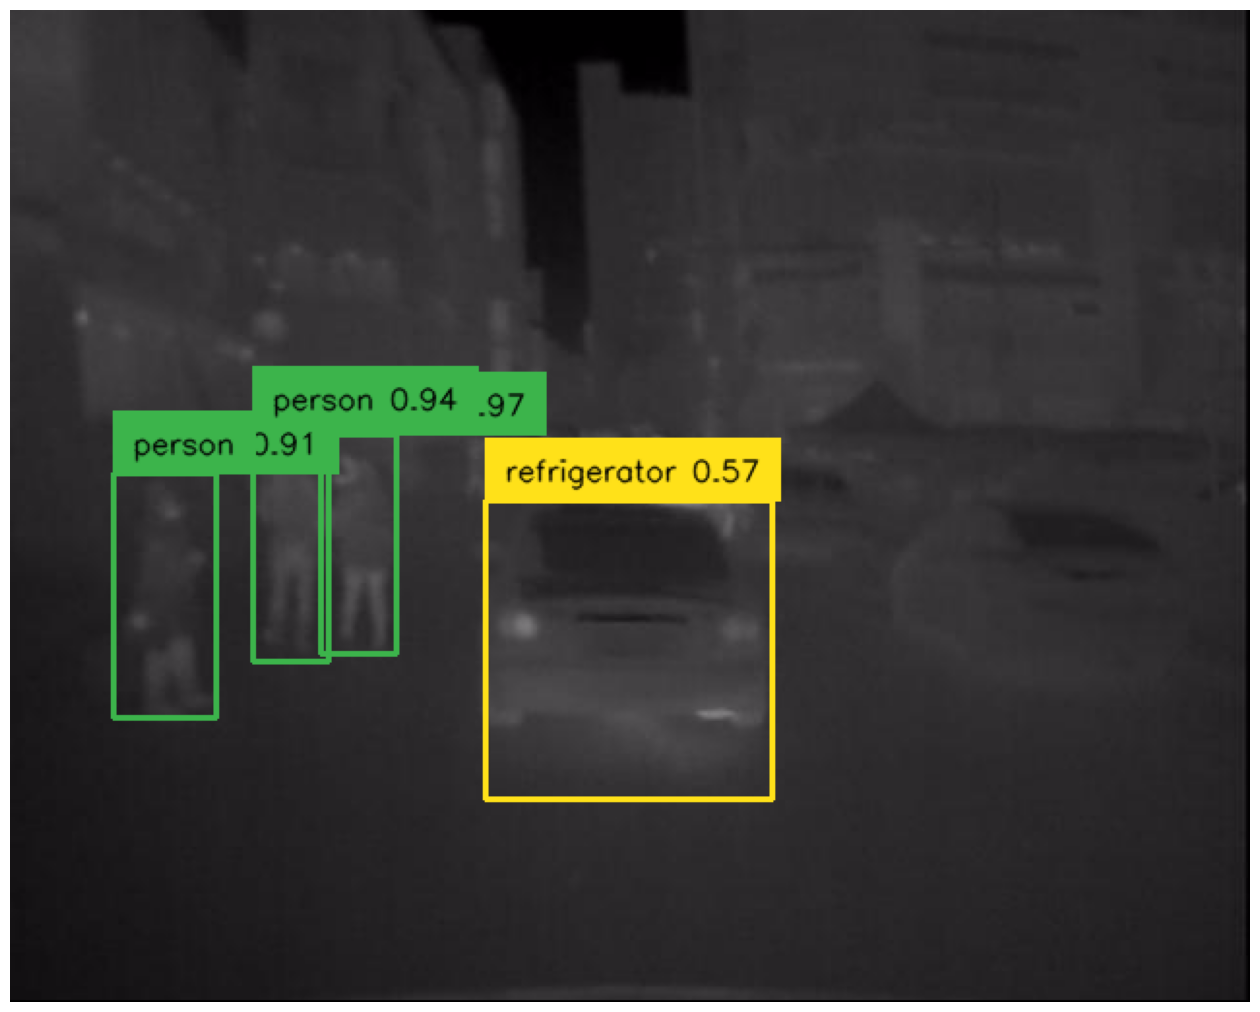

In [12]:
import cv2
import torch
import supervision as sv


with torch.no_grad():

    # load image and predict
    image = cv2.imread(IMAGE_PATH)
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs, 
        threshold=CONFIDENCE_TRESHOLD, 
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results).with_nms(threshold=IOU_TRESHOLD)

labels = [
    f"{model.config.id2label[class_id]} {confidence:0.2f}" 
    for _, _, confidence, class_id, _ 
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline  
sv.plot_image(frame, (16, 16))

In [38]:
# from torch.utils.data import DataLoader
# import os

# NUM_WORKERS = os.cpu_count()

# def collate_fn(batch):
#     pixel_values = [item[0] for item in batch]
#     encoding = image_processor.pad(pixel_values, return_tensors="pt")
#     labels = [item[1] for item in batch]
#     return {
#         'pixel_values': encoding['pixel_values'],
#         'pixel_mask': encoding['pixel_mask'],
#         'labels': labels
#     }

# TRAIN_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4, shuffle=True)
# VAL_DATALOADER = DataLoader(dataset=VAL_DATASET, collate_fn=collate_fn, batch_size=4)
# TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=4)

In [ ]:
# import random
# import cv2
# import numpy as np

# # select random image
# image_ids = TRAIN_DATASET.coco.getImgIds()
# image_id = random.choice(image_ids)
# print('Image #{}'.format(image_id))

# # load image and annotatons 
# image = TRAIN_DATASET.coco.loadImgs(image_id)[0]
# annotations = TRAIN_DATASET.coco.imgToAnns[image_id]
# image_path = os.path.join(TRAIN_DATASET.root, image['file_name'])
# image = cv2.imread(image_path)



# #***********************************
# # annotate
# detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)


# # detections = sv.Detections.from_coco_annotations(
# #     images_directory_path=TRAIN_DATASET.root,
# #     annotations_path=f"{TRAIN_DATASET.root}/_annotations.coco.json"
# # )

# # we will use id2label function for training
# categories = TRAIN_DATASET.coco.cats
# id2label = {k: v['name'] for k,v in categories.items()}


# #***************************
# # annotate
# specific_image_detections = None
# for path, frame, anno in detections:
#     if image_path in path:
#         specific_image_detections = (path, frame, anno)
#         break
    
# if specific_image_detections:
#     path, frame, anno = specific_image_detections
#     if anno.xyxy.size != 0:
#         class_id = anno.class_id.tolist()
#         labels = [categories[id]['name'] for id in class_id]
#         # labels = [f"{categories[id]}" for id in class_id]
        
        
# box_annotator = sv.BoxAnnotator()
# frames = box_annotator.annotate(scene=image, detections=anno, labels=labels)
# %matplotlib inline
# sv.plot_image(image, (16, 16))


# #*************************

## The COCO data loaders was already created so let's visualize data entry first.

## Visualize data entry

You can use/run this multiple times to see different image

Image #1471


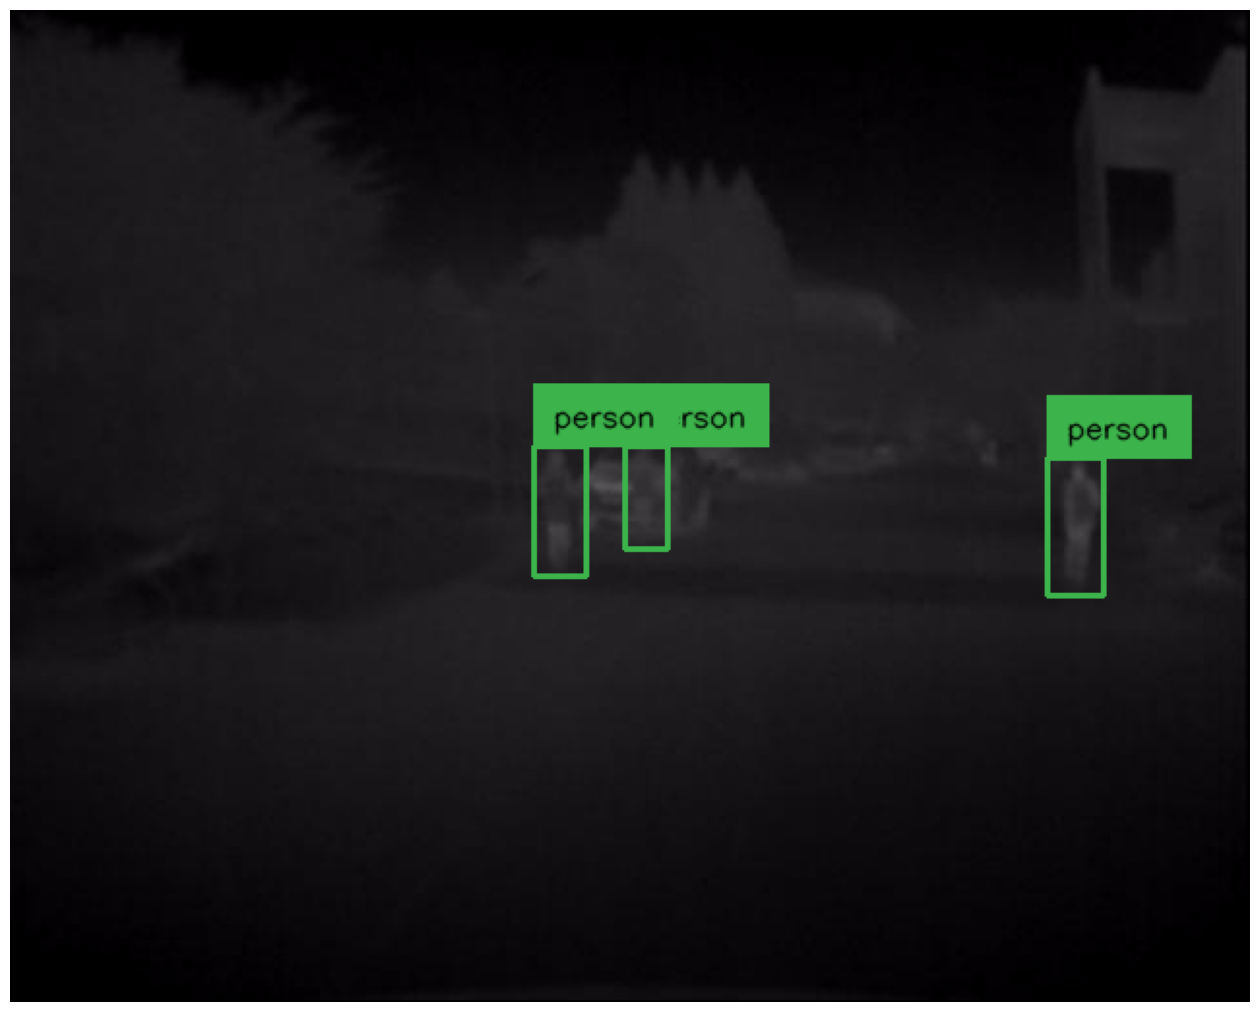

In [13]:
import random
import cv2
import numpy as np
import supervision as sv
import matplotlib.pyplot as plt

# select random image
image_ids = TRAIN_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons 
image = TRAIN_DATASET.coco.loadImgs(image_id)[0]
annotations = TRAIN_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TRAIN_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

    # we will use id2label function for training
categories = TRAIN_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

# Check if there are any annotations for the image
if annotations:
    # annotate
    detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

    class_ids = detections.class_id
    labels = [id2label[class_id] for class_id in class_ids]

    box_annotator = sv.BoxAnnotator()
    frames = box_annotator.annotate(scene=image, detections=detections, labels=labels)
    %matplotlib inline
    sv.plot_image(image, (16, 16))
else:
    print('No annotations found for this image.')
    plt.imshow(image)
    plt.show()


In [14]:
from torch.utils.data import DataLoader
import os

NUM_WORKERS = os.cpu_count()

def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

TRAIN_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=VAL_DATASET, collate_fn=collate_fn, batch_size=4)
TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=4)

## Train model with PyTorch Lightning

**NOTE:** Here we define a regular PyTorch dataset. Each item of the dataset is an image and corresponding annotations. Torchvision already provides a `CocoDetection` dataset, which we can use. We only add a feature extractor (`DetrImageProcessor`) to resize + normalize the images, and to turn the annotations (which are in COCO format) in the format that DETR expects. It will also resize the annotations accordingly.

In [15]:
import pytorch_lightning as pl
from transformers import DetrForObjectDetection
import torch


class Detr(pl.LightningModule):

    def __init__(self, lr, lr_backbone, weight_decay):
        super().__init__()
        self.model = DetrForObjectDetection.from_pretrained(
            pretrained_model_name_or_path=CHECKPOINT, 
            num_labels=len(id2label),
            ignore_mismatched_sizes=True
        )
        
        self.lr = lr
        self.lr_backbone = lr_backbone
        self.weight_decay = weight_decay

    def forward(self, pixel_values, pixel_mask):
        return self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    def common_step(self, batch, batch_idx):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]
        labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)

        loss = outputs.loss
        loss_dict = outputs.loss_dict

        return loss, loss_dict

    def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)     
        # logs metrics for each training_step, and the average across the epoch
        self.log("training_loss", loss)
        for k,v in loss_dict.items():
            self.log("train_" + k, v.item())

        return loss

    def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)     
        self.log("validation/loss", loss)
        for k, v in loss_dict.items():
            self.log("validation_" + k, v.item())
            
        return loss

    def configure_optimizers(self):
        # DETR authors decided to use different learning rate for backbone
        # you can learn more about it here: 
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L22-L23
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L131-L139
        param_dicts = [
            {
                "params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
            {
                "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                "lr": self.lr_backbone,
            },
        ]
        return torch.optim.AdamW(param_dicts, lr=self.lr, weight_decay=self.weight_decay)

    def train_dataloader(self):
        return TRAIN_DATALOADER

    def val_dataloader(self):
        return VAL_DATALOADER

Let's start tensorboard.

In [16]:
%cd {HOME}

/data/Singlemodality_DETR_V1


In [17]:
%load_ext tensorboard

In [19]:
%tensorboard --logdir lightning_logs/

Reusing TensorBoard on port 6006 (pid 36577), started 6 days, 11:45:33 ago. (Use '!kill 36577' to kill it.)

In [57]:
# %reload_ext tensorboard

In [ ]:
# !kill 5212

In [20]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

batch = next(iter(TRAIN_DATALOADER))
outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoin

In [21]:
outputs.logits.shape

torch.Size([4, 100, 7])

In [22]:
from pytorch_lightning import Trainer

%cd {HOME}

# settings
# MAX_EPOCHS = 25
MAX_EPOCHS = 50

# pytorch_lightning < 2.0.0
# trainer = Trainer(gpus=1, max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

# pytorch_lightning >= 2.0.0
trainer = Trainer(devices=[1], accelerator="gpu", max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

trainer.fit(model)

GPU available: True (cuda), used: True


/data/Singlemodality_DETR_V1


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name  | Type                   | Params
-------------------------------------------------
0 | model | DetrForObjectDetection | 41.5 M
-------------------------------------------------
41.3 M    Trainable params
222 K     Non-trainable params
41.5 M    Total params
166.012   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/xubuntu/anaconda3/envs/transformer_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=39` in the `DataLoader` to improve performance.
/home/xubuntu/anaconda3/envs/transformer_env/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/xubuntu/anaconda3/envs/transformer_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=39` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/home/xubuntu/anaconda3/envs/transformer_env/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


save model

In [33]:
# MODEL_PATH = os.path.join(HOME, 'lwir-model')

In [34]:
# model.model.save_pretrained(MODEL_PATH)

## Inference on test dataset

Let's visualize the predictions of DETR on the first image of the validation set.

In [23]:
model.to(DEVICE)

Detr(
  (model): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): FeatureListNet(
            (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            (bn1): DetrFrozenBatchNorm2d()
            (act1): ReLU(inplace=True)
            (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            (layer1): Sequential(
              (0): Bottleneck(
                (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn1): DetrFrozenBatchNorm2d()
                (act1): ReLU(inplace=True)
                (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn2): DetrFrozenBatchNorm2d()
                (drop_block): Identity()
                (act2): ReLU(inplace=True)
                (aa): Identity()
                (conv3): Conv2d(64, 256

Image #783
ground truth


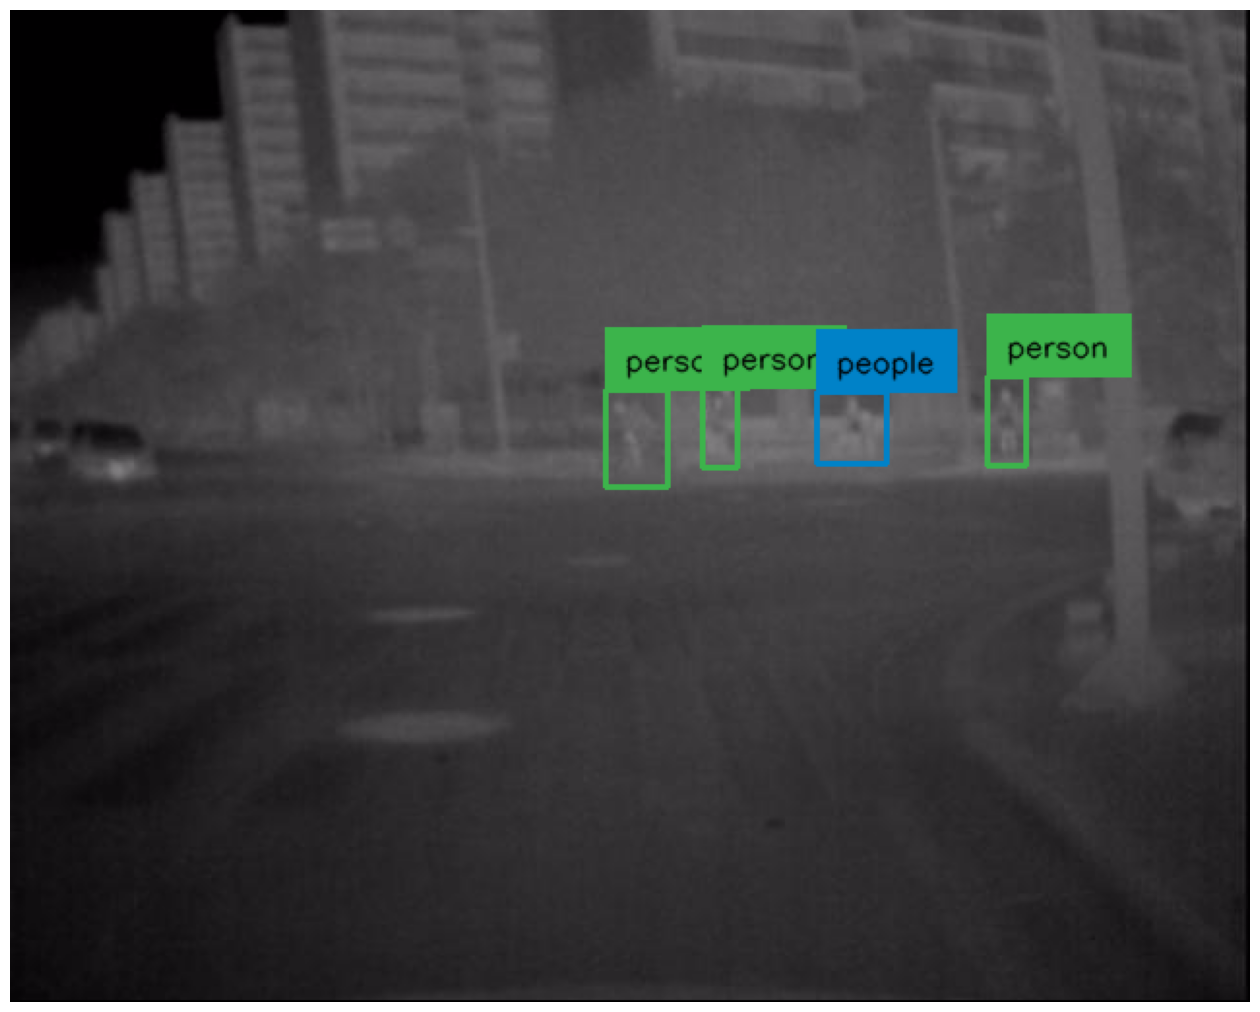

detections


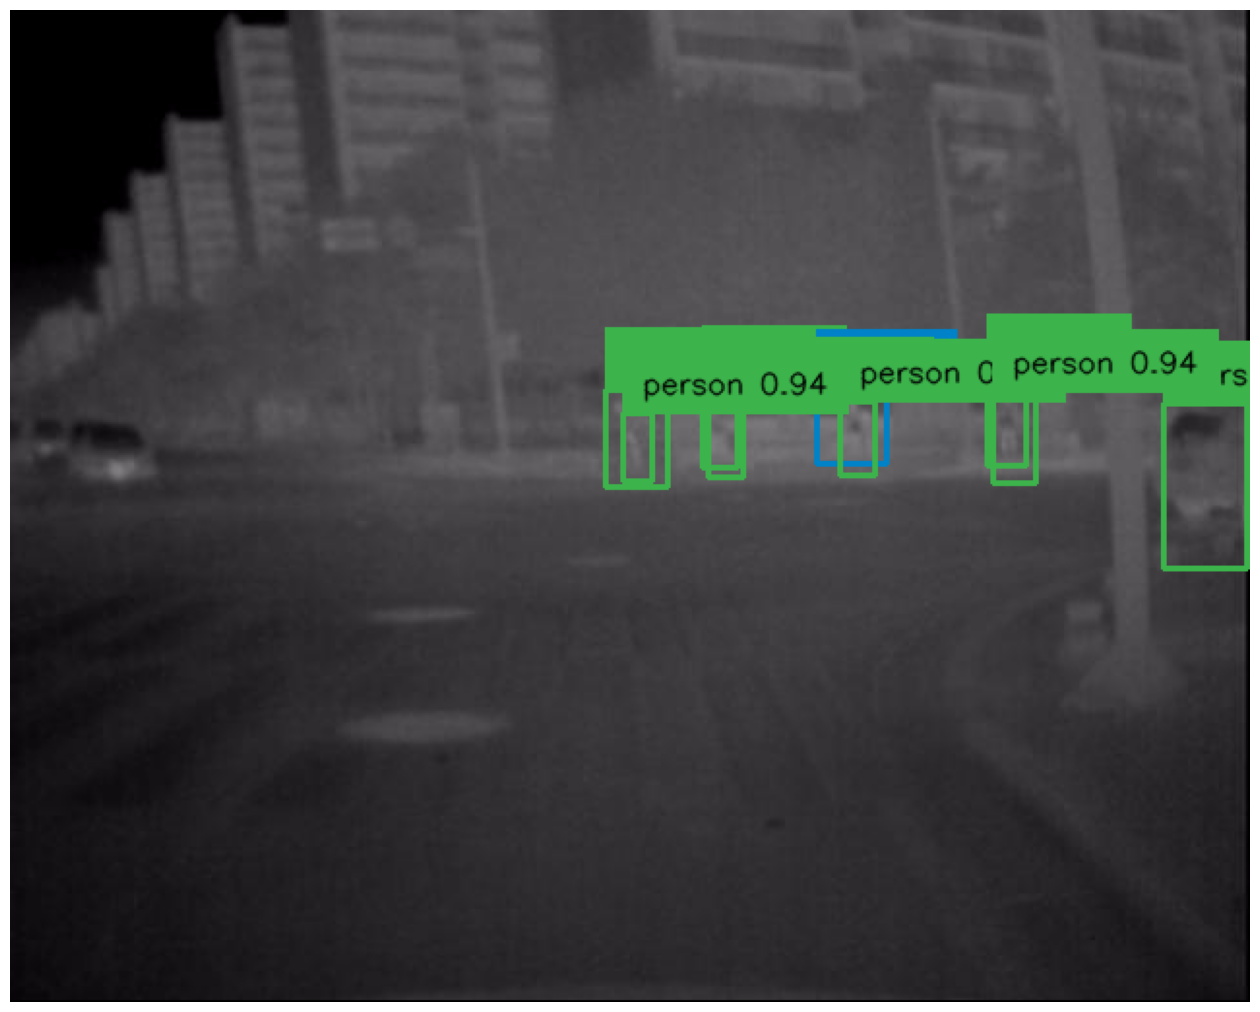

In [31]:
import random
import cv2
import numpy as np


# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons 
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)


# # annotate
# detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

# class_ids = detections.class_id
# labels = [id2label[class_id] for class_id in class_ids]


#=============================================

# Check if there are any annotations for the image
if annotations:
    # annotate
    detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

    class_ids = detections.class_id
    labels = [id2label[class_id] for class_id in class_ids]

    box_annotator = sv.BoxAnnotator()
    frames = box_annotator.annotate(scene=image, detections=detections, labels=labels)
    print('ground truth')
    %matplotlib inline
    sv.plot_image(image, (16, 16))
else:
    print('No annotations found for this image.')
    sv.plot_image(image, (16, 16))


# inference
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs, 
        threshold=CONFIDENCE_TRESHOLD, 
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results).with_nms(threshold=0.5)

labels = [
    f"{id2label[class_id]} {confidence:0.2f}" 
    for _, _, confidence, class_id, _ 
    in detections
]

frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

print('detections')
%matplotlib inline  
sv.plot_image(frame, (16, 16))

## Evaluation on test dataset

Finally, we evaluate the model on the `TEST_DATASET`. For this we make use of the `CocoEvaluator` class available in a tiny [PyPi package](https://github.com/NielsRogge/coco-eval) made by [Niels Rogge](https://github.com/NielsRogge) . This class is entirely based on the [original evaluator](https://github.com/facebookresearch/detr/blob/main/datasets/coco_eval.py) class used by the DETR authors.

In [44]:
# %pip install -q coco_eval

Note: you may need to restart the kernel to use updated packages.


In [32]:
def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def prepare_for_coco_detection(predictions):
    coco_results = []
    for original_id, prediction in predictions.items():
        if len(prediction) == 0:
            continue

        boxes = prediction["boxes"]
        boxes = convert_to_xywh(boxes).tolist()
        scores = prediction["scores"].tolist()
        labels = prediction["labels"].tolist()

        coco_results.extend(
            [
                {
                    "image_id": original_id,
                    "category_id": labels[k],
                    "bbox": box,
                    "score": scores[k],
                }
                for k, box in enumerate(boxes)
            ]
        )
    return coco_results

In [33]:
from coco_eval import CocoEvaluator
from tqdm.notebook import tqdm

import numpy as np

evaluator = CocoEvaluator(coco_gt=TEST_DATASET.coco, iou_types=["bbox"])

print("Running evaluation...")


for idx, batch in enumerate(tqdm(TEST_DATALOADER)):
    pixel_values = batch["pixel_values"].to(DEVICE)
    pixel_mask = batch["pixel_mask"].to(DEVICE)
    labels = [{k: v.to(DEVICE) for k, v in t.items()} for t in batch["labels"]]

    with torch.no_grad():
        outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
    results = image_processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes)

    predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
    predictions = prepare_for_coco_detection(predictions)

    # Check if there are any predictions for the image
    if predictions:
        evaluator.update(predictions)
    else:
        print('No predictions found for this image.')


# for idx, batch in enumerate(tqdm(TEST_DATALOADER)):
#     pixel_values = batch["pixel_values"].to(DEVICE)
#     pixel_mask = batch["pixel_mask"].to(DEVICE)
#     labels = [{k: v.to(DEVICE) for k, v in t.items()} for t in batch["labels"]]

#     with torch.no_grad():
#       outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

#     orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
#     results = image_processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes)

#     predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
#     predictions = prepare_for_coco_detection(predictions)
#     evaluator.update(predictions)

evaluator.synchronize_between_processes()
evaluator.accumulate()
evaluator.summarize()

Running evaluation...


  0%|          | 0/563 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.52s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.032
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.102
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

## Save and load model

In [34]:
MODEL_PATH = os.path.join(HOME, 'custom-model-lwir')

In [35]:
model.model.save_pretrained(MODEL_PATH)

In [36]:
model = DetrForObjectDetection.from_pretrained(MODEL_PATH)
model.to(DEVICE)

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      